
# Import Libraries

In [42]:
import numpy as np
from qiskit import ClassicalRegister
from qiskit import QuantumRegister
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram

# Create Small Pachinko

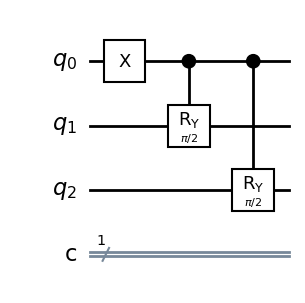

In [43]:
# Initialize  register
cr = ClassicalRegister(1, name='c')
qr = QuantumRegister(3, name='q')
small_pac = QuantumCircuit(qr, cr, name='small_pachinko')
# Initialize rotation gates
val = np.pi / 2
small_pac.x(0)
small_pac.cry(val, control_qubit=0, target_qubit=1)
small_pac.cry(val, control_qubit=0, target_qubit=2)
# Draw circuit
small_pac.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

# Simulate Small Circuit

0 0.4948
1 0.5052


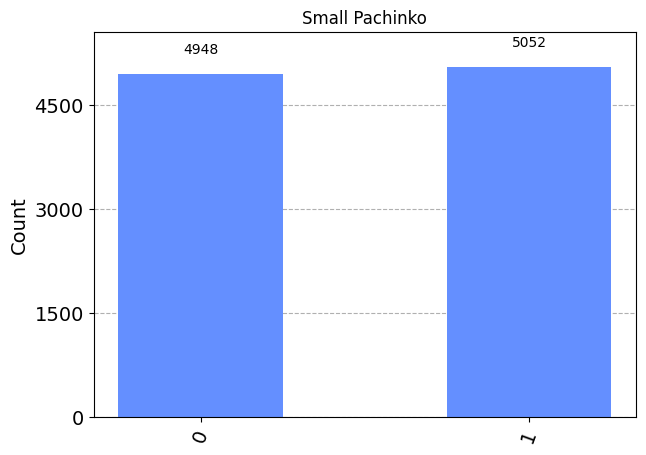

In [44]:
# Setup simulator backend
simulator = Aer.get_backend('aer_simulator')

def simulate_circuit(circuit, shots=10_000):
    """
    Simulate the given quantum circuit using the aer_simulator backend from Qiskit.

    Parameters:
    - circuit (QuantumCircuit): The quantum circuit to simulate.
    - shots (int): The number of shots for the simulation.

    Returns:
    - dict: A dictionary with measurement outcomes as keys and their frequencies as values.
    """
    # Transpile the circuit for the simulator backend
    transpiled_circuit = transpile(circuit, simulator)

    # Run the simulation
    job = simulator.run(transpiled_circuit, shots=shots)

    # Get the results
    result = job.result()

    # Get counts of measurement outcomes
    counts = result.get_counts(transpiled_circuit)

    return counts

# Create a copy of the 'small_pac' circuit
markov_circuit = small_pac.copy()

# Measure qubit at index 2 into classical bit at index 0
markov_circuit.measure(2, 0)

# Set the number of shots for the simulation
nshots = 10_000

# Simulate the circuit
counts = simulate_circuit(markov_circuit, nshots)

# Print the normalized results
for key in sorted(counts.keys()):
    print(key, counts[key] / nshots)

# Visualize the results using a histogram
plot_histogram(counts, title='Small Pachinko')


# Create Big Pachinko

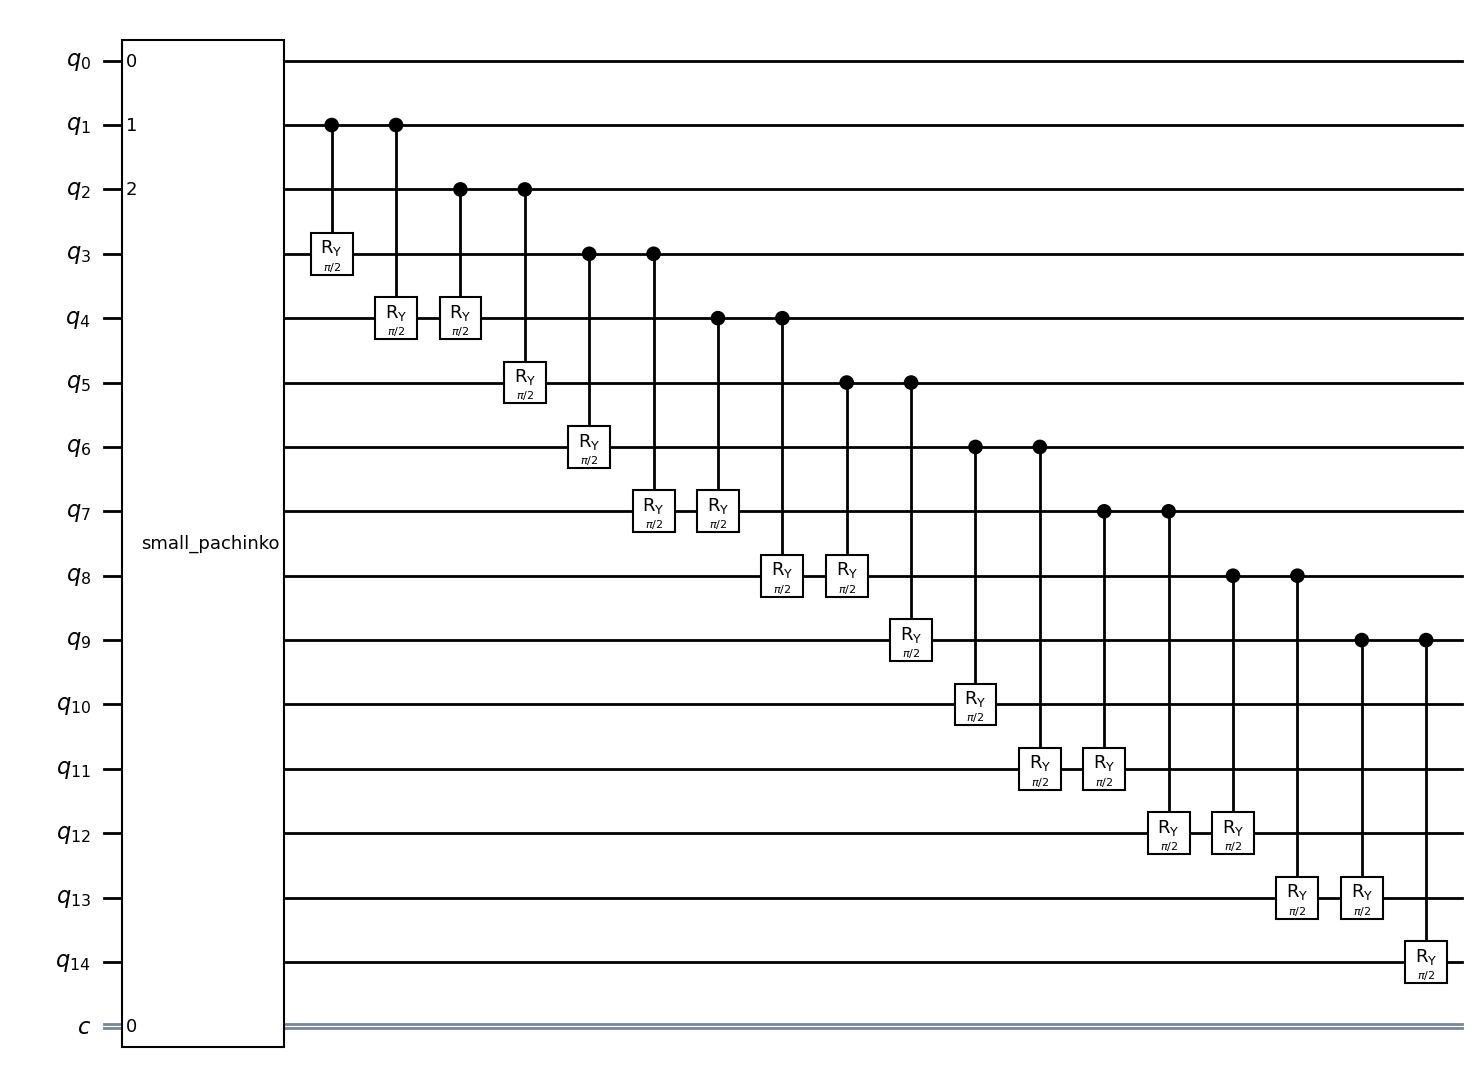

In [45]:
# Idea: Repeat the steps from before
# Initialize  register
cr = ClassicalRegister(1, name='c')
qr = QuantumRegister(15, name='q')
big_pac = QuantumCircuit(qr, cr, name='small_pachinko')
# Appending the 'small_pac' circuit to the 'markov' circuit
big_pac.append(small_pac, qr[:3], cr)
# Angle for controlled-rotation gates
rotation_angle = np.pi / 2
# Apply controlled rotation gates with the specified angle
c_qubits=list(range(1,10,1))+list(range(1,10,1))
c_qubits.sort()
t_qubits=list(range(3,15,1))+list([4,7,8,11,12,13])
t_qubits.sort()

for cq, tq in zip(c_qubits, t_qubits):
    big_pac.cry(rotation_angle, control_qubit=qr[cq], target_qubit=qr[tq])

'''
(Explicit)
big_pac.cry(rotation_angle, control_qubit=qr[1], target_qubit=qr[3])
big_pac.cry(rotation_angle, control_qubit=qr[1], target_qubit=qr[4])
big_pac.cry(rotation_angle, control_qubit=qr[2], target_qubit=qr[4])
big_pac.cry(rotation_angle, control_qubit=qr[2], target_qubit=qr[5])
big_pac.cry(rotation_angle, control_qubit=qr[3], target_qubit=qr[6])
big_pac.cry(rotation_angle, control_qubit=qr[3], target_qubit=qr[7])
big_pac.cry(rotation_angle, control_qubit=qr[4], target_qubit=qr[7])
big_pac.cry(rotation_angle, control_qubit=qr[4], target_qubit=qr[8])
big_pac.cry(rotation_angle, control_qubit=qr[5], target_qubit=qr[8])
big_pac.cry(rotation_angle, control_qubit=qr[5], target_qubit=qr[9])
big_pac.cry(rotation_angle, control_qubit=qr[6], target_qubit=qr[10])
big_pac.cry(rotation_angle, control_qubit=qr[6], target_qubit=qr[11])
big_pac.cry(rotation_angle, control_qubit=qr[7], target_qubit=qr[11])
big_pac.cry(rotation_angle, control_qubit=qr[7], target_qubit=qr[12])
big_pac.cry(rotation_angle, control_qubit=qr[8], target_qubit=qr[12])
big_pac.cry(rotation_angle, control_qubit=qr[8], target_qubit=qr[13])
big_pac.cry(rotation_angle, control_qubit=qr[9], target_qubit=qr[13])
big_pac.cry(rotation_angle, control_qubit=qr[9], target_qubit=qr[14])
'''

# Draw circuit
big_pac.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)



# Simulate Big Circuit

0 0.9388
1 0.0612


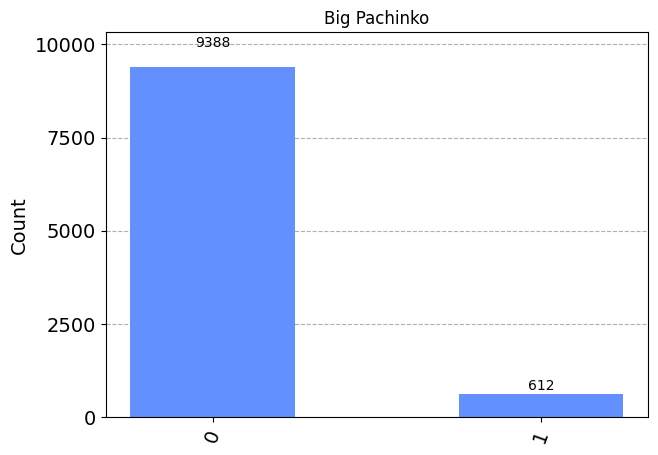

In [53]:
# Create a copy of the 'small_pac' circuit
markov_circuit = big_pac.copy()

# Measure qubit at index 2 into classical bit at index 0
markov_circuit.measure(10, 0)

# Set the number of shots for the simulation
nshots = 10_000

# Simulate the circuit
counts = simulate_circuit(markov_circuit, nshots)

# Print the normalized results
for key in sorted(counts.keys()):
    print(key, counts[key] / nshots)

# Visualize the results using a histogram
plot_histogram(counts, title='Big Pachinko')
